<a href="https://colab.research.google.com/github/Bruce1998a/Libro---Calidad-de-datos-clim-ticos-con-Machine-Learning/blob/main/Secci%C3%B3n_5_3_relleno_por_mediana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar Precipitacion_diaria.csv**

Ejemplo practico para la sección 5.3 del libro Calidad de datos climáticos con Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Cargar datos (separador ;)
df = pd.read_csv("Precipitacion_diaria.csv", sep=";")

# Normalizar nombres de columnas
df.columns = df.columns.str.lower().str.strip()

# Renombrar columnas explícitamente
df = df.rename(columns={df.columns[0]: "fecha",
                        df.columns[1]: "pre"})

# Convertir fecha (formato día/mes/año)
df["fecha"] = pd.to_datetime(
    df["fecha"],
    dayfirst=True,
    errors="coerce"
)

# Convertir precipitación a numérico
df["pre"] = (
    df["pre"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)

df["pre"] = pd.to_numeric(df["pre"], errors="coerce")

# Ordenar cronológicamente
df = df.sort_values("fecha").reset_index(drop=True)

df.head()


,fecha,pre
0,1982-01-01,23.6875
1,1982-01-02,11.8437
2,1982-01-03,59.2187
3,1982-01-04,11.8437
4,1982-01-05,11.8437


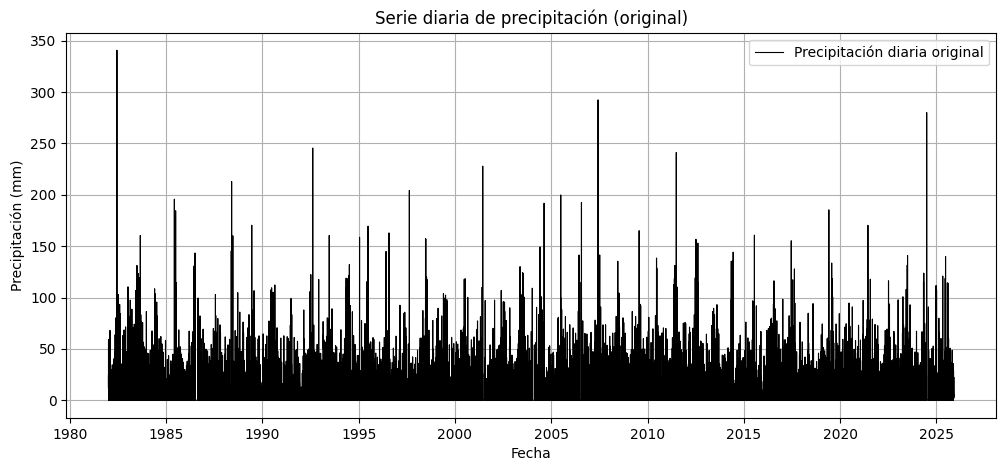

In [3]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["pre"],
    color="black",
    linewidth=0.8,
    label="Precipitación diaria original"
)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Serie diaria de precipitación (original)")
plt.legend()
plt.grid(True)

plt.show()


In [4]:
np.random.seed(42)

porcentaje_faltantes = 0.20

indices_faltantes = df.sample(
    frac=porcentaje_faltantes,
    random_state=42
).index

# Guardar serie original
df["pre_original"] = df["pre"]

# Introducir datos faltantes
df.loc[indices_faltantes, "pre"] = np.nan

print("Datos faltantes tras eliminación artificial:")
print(df["pre"].isna().sum())


Datos faltantes tras eliminación artificial:
3208


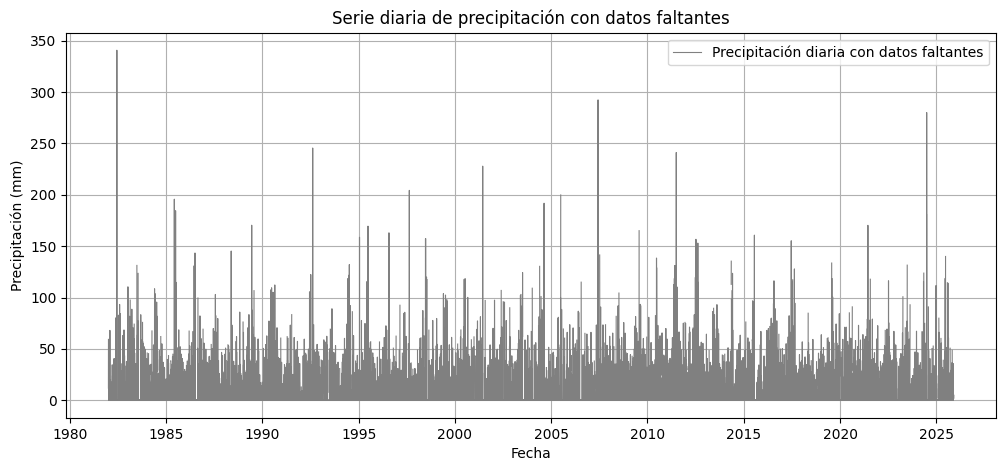

In [5]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["pre"],
    color="gray",
    linewidth=0.8,
    label="Precipitación diaria con datos faltantes"
)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Serie diaria de precipitación con datos faltantes")
plt.legend()
plt.grid(True)

plt.show()


In [6]:
# Día del año
df["dia_anio"] = df["fecha"].dt.dayofyear

# Mediana diaria climatológica (calculada desde datos con vacíos)
mediana_diaria = (
    df
    .groupby("dia_anio")["pre"]
    .median()
)

mediana_diaria.head()


,pre
dia_anio,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [7]:
def rellenar_por_mediana(row):
    if pd.isna(row["pre"]):
        return mediana_diaria.loc[row["dia_anio"]]
    else:
        return row["pre"]

df["pre_rellena_mediana"] = df.apply(
    rellenar_por_mediana,
    axis=1
)

print("Datos faltantes tras el relleno:")
print(df["pre_rellena_mediana"].isna().sum())


Datos faltantes tras el relleno:
0


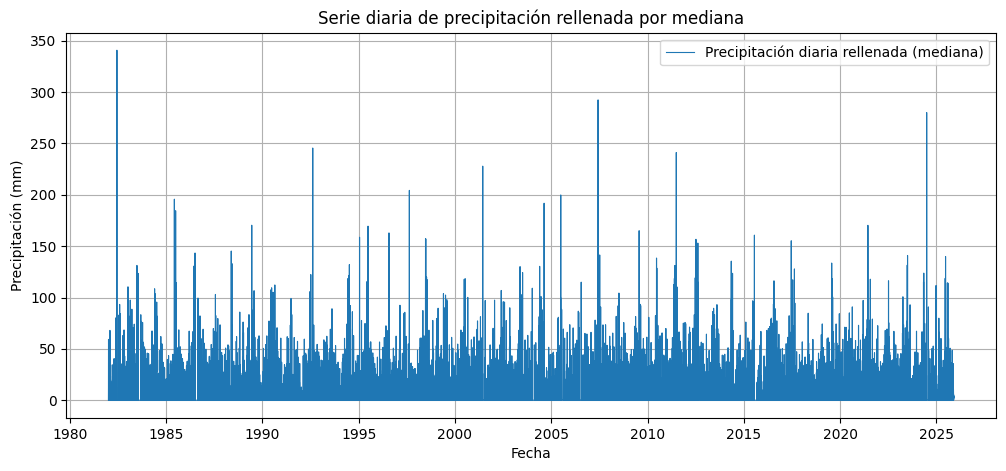

In [8]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["pre_rellena_mediana"],
    color="tab:blue",
    linewidth=0.8,
    label="Precipitación diaria rellenada (mediana)"
)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Serie diaria de precipitación rellenada por mediana")
plt.legend()
plt.grid(True)

plt.show()


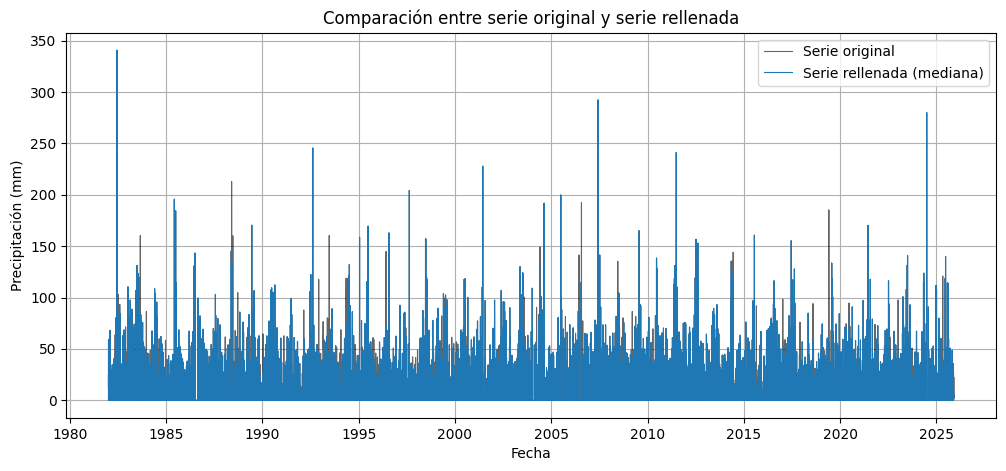

In [9]:
plt.figure(figsize=(12,5))

plt.plot(
    df["fecha"],
    df["pre_original"],
    color="black",
    alpha=0.6,
    linewidth=0.8,
    label="Serie original"
)

plt.plot(
    df["fecha"],
    df["pre_rellena_mediana"],
    color="tab:blue",
    linewidth=0.8,
    label="Serie rellenada (mediana)"
)

plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Comparación entre serie original y serie rellenada")
plt.legend()
plt.grid(True)

plt.show()


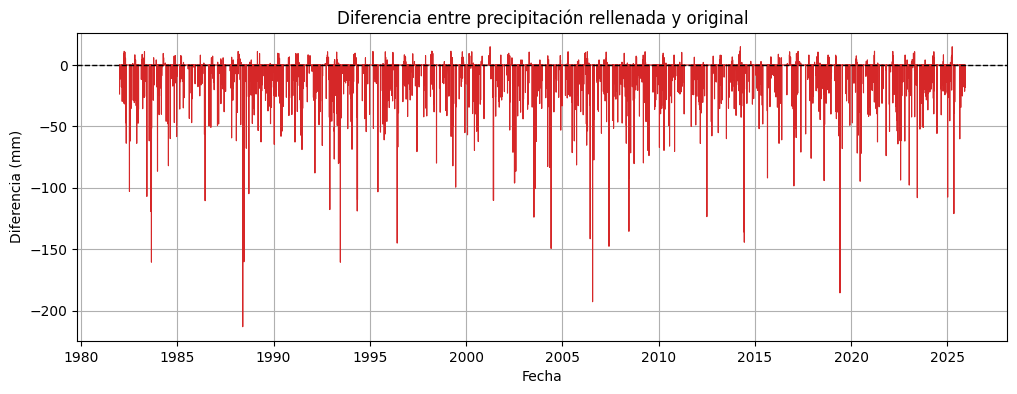

In [10]:
plt.figure(figsize=(12,4))

plt.plot(
    df["fecha"],
    df["pre_rellena_mediana"] - df["pre_original"],
    color="tab:red",
    linewidth=0.8
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.xlabel("Fecha")
plt.ylabel("Diferencia (mm)")
plt.title("Diferencia entre precipitación rellenada y original")
plt.grid(True)

plt.show()


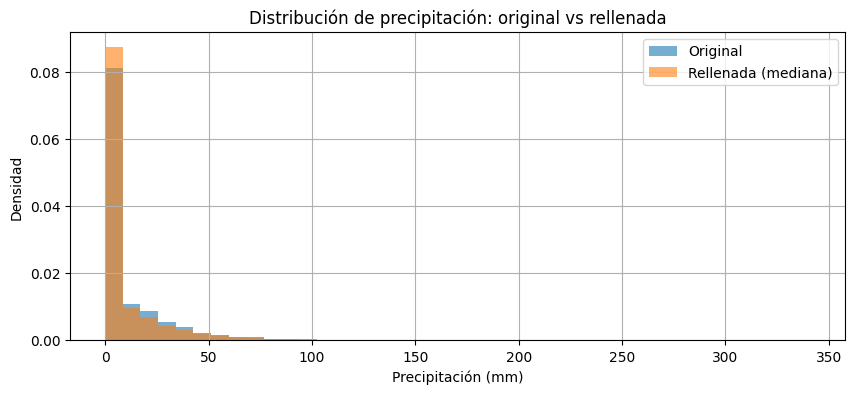

In [11]:
plt.figure(figsize=(10,4))

plt.hist(
    df["pre_original"],
    bins=40,
    alpha=0.6,
    label="Original",
    density=True
)

plt.hist(
    df["pre_rellena_mediana"],
    bins=40,
    alpha=0.6,
    label="Rellenada (mediana)",
    density=True
)

plt.xlabel("Precipitación (mm)")
plt.ylabel("Densidad")
plt.title("Distribución de precipitación: original vs rellenada")
plt.legend()
plt.grid(True)

plt.show()


In [12]:
df.to_csv(
    "precipitacion_diaria_rellena_mediana.csv",
    index=False
)

print("Archivo guardado: precipitacion_diaria_rellena_mediana.csv")


Archivo guardado: precipitacion_diaria_rellena_mediana.csv
